In [1]:
import sys

sys.path.append('..')

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from projections import SimplexProjection


def plot_3d_simplex(simplex, point, projections, distances):
    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("3D Simplex and Point Projections")
    ax.scatter(simplex[:, 0], simplex[:, 1], simplex[:, 2], color='r', label='Simplex Vertices')
    ax.scatter(point[0], point[1], point[2], color='b', label='Point Outside Simplex')

    faces = Poly3DCollection([simplex])
    faces.set_alpha(0.3)
    faces.set_facecolor('cyan')
    ax.add_collection3d(faces)
    for i in range(3):
        for j in range(i + 1, 3):
            ax.plot(*zip(simplex[i], simplex[j]), color='black')

    ax.scatter(projections[:, 0], projections[:, 1], projections[:, 2], color='g', label='Projections')

    for proj, dist in zip(projections, distances):
        ax.plot(*zip(point, proj), 'm--')
        ax.text(*(proj + point) / 2, f'{dist:.2f}', color='m')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()


def plot_2d_projections(simplex, point, projections, distances):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    ax = axes[0]
    ax.set_title("XY Projection")
    ax.scatter(simplex[:, 0], simplex[:, 1], color='r', label='Simplex Vertices')
    ax.scatter(point[0], point[1], color='b', label='Point')
    ax.scatter(projections[:, 0], projections[:, 1], color='g', label='Projections')
    ax.plot(simplex[[0, 1, 2, 0], 0], simplex[[0, 1, 2, 0], 1], 'k-', label='Simplex Edges')
    for proj, dist in zip(projections, distances):
        ax.plot([point[0], proj[0]], [point[1], proj[1]], 'm--')
        ax.text(*(proj[:2] + point[:2]) / 2, f'{dist:.2f}', color='m')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(True)

    ax = axes[1]
    ax.set_title("XZ Projection")
    ax.scatter(simplex[:, 0], simplex[:, 2], color='r')
    ax.scatter(point[0], point[2], color='b')
    ax.scatter(projections[:, 0], projections[:, 2], color='g')
    ax.plot(simplex[[0, 1, 2, 0], 0], simplex[[0, 1, 2, 0], 2], 'k-')
    for proj, dist in zip(projections, distances):
        ax.plot([point[0], proj[0]], [point[2], proj[2]], 'm--')
        ax.text(*(proj[::2] + point[::2]) / 2, f'{dist:.2f}', color='m')

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.grid(True)

    ax = axes[2]
    ax.set_title("YZ Projection")
    ax.scatter(simplex[:, 1], simplex[:, 2], color='r')
    ax.scatter(point[1], point[2], color='b')
    ax.scatter(projections[:, 1], projections[:, 2], color='g')
    ax.plot(simplex[[0, 1, 2, 0], 1], simplex[[0, 1, 2, 0], 2], 'k-')
    for proj, dist in zip(projections, distances):
        ax.plot([point[1], proj[1]], [point[2], proj[2]], 'm--')
        ax.text(*(proj[1:] + point[1:]) / 2, f'{dist:.2f}', color='m')

    ax.set_xlabel('Y')
    ax.set_ylabel('Z')
    ax.grid(True)

    plt.tight_layout()
    plt.show()


simplex = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0]])
point = np.array([0.3, 0.4, 0.5])

projector = SimplexProjection([simplex])
vertex_projections = simplex
edge_projections = np.array(
    [projector.project_point_to_simplex(point, simplex[[i, j]]) for i in range(3) for j in range(i + 1, 3)])
simplex_projection, _ = projector.find_closest_projection([point])
simplex_projection = simplex_projection[0]

all_projections = np.vstack((vertex_projections, edge_projections, simplex_projection))
distances = np.linalg.norm(point - all_projections, axis=1)

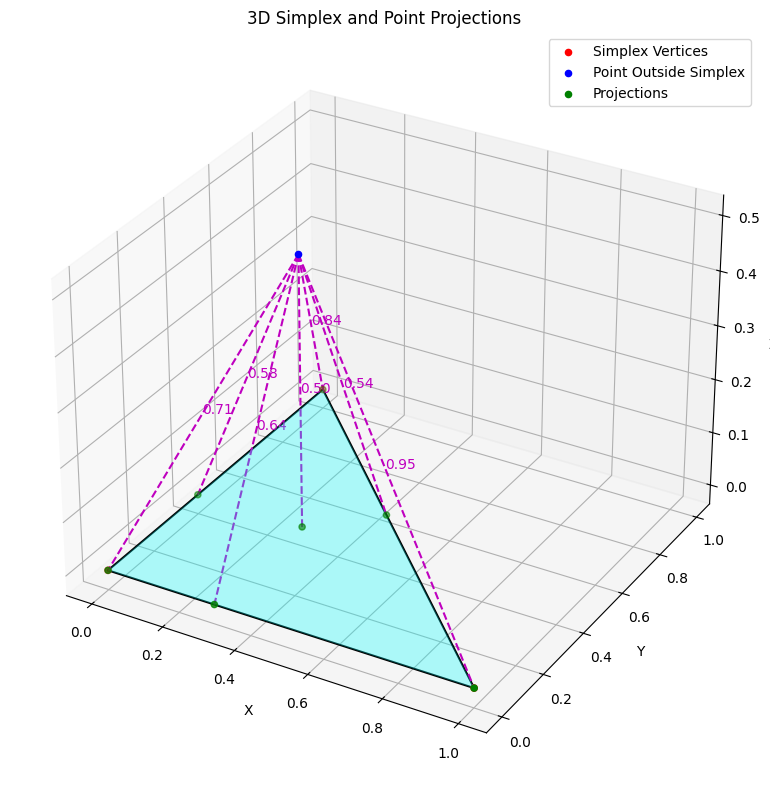

In [18]:
plot_3d_simplex(simplex, point, all_projections, distances)

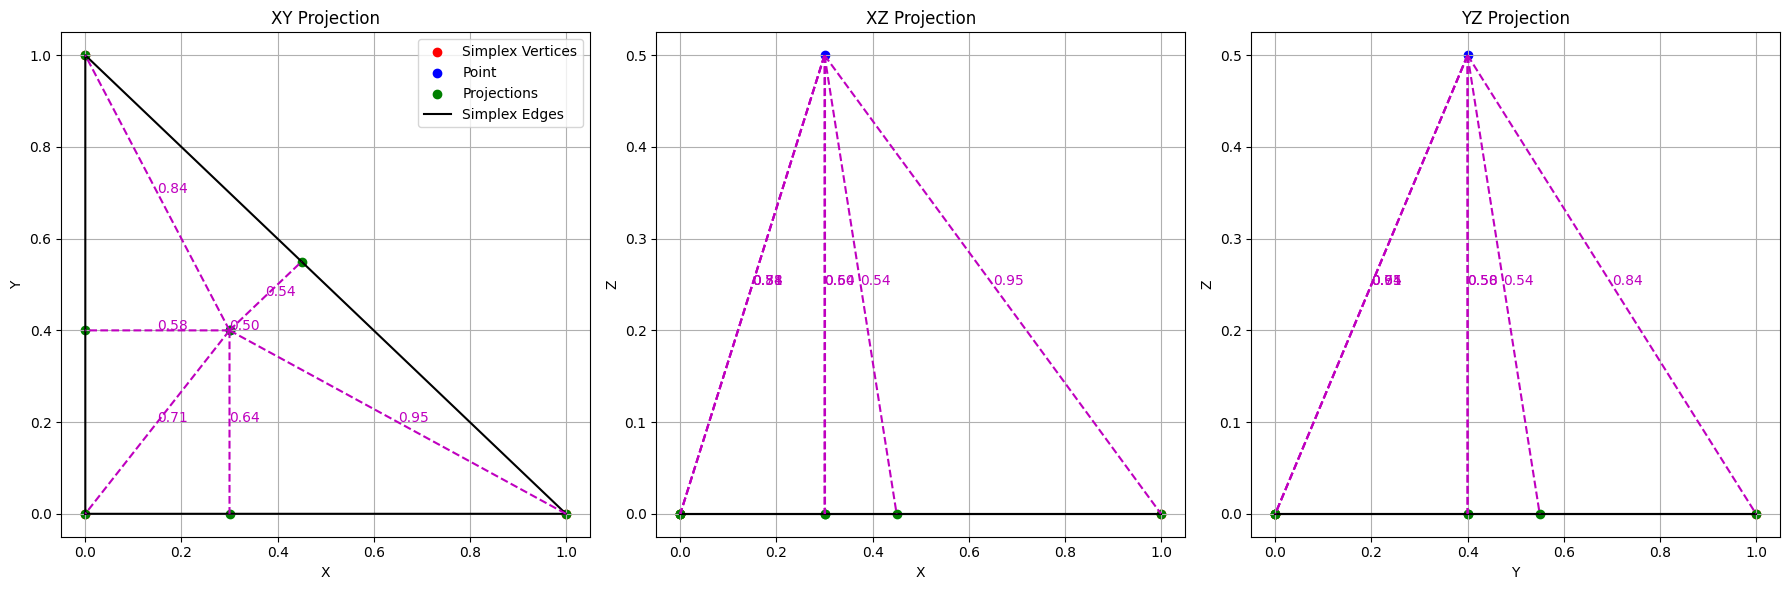

In [19]:
plot_2d_projections(simplex, point, all_projections, distances)